In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Bar Charts

[0.5 1.5 2.5 3.5]


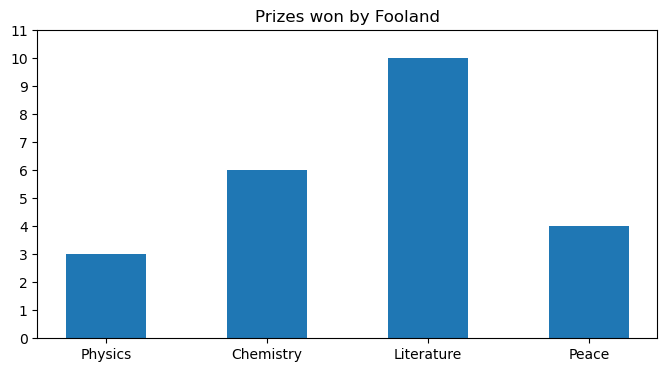

In [9]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]

bar_width = 0.5

# Create bar middle locations, two bar width's apart
# xlocations = [0.5, 1.5, 2.5, 3.5], middle of each bar
xlocations = np.array(range(len(foo_data))) + bar_width
plt.bar(xlocations, foo_data, width=bar_width)

# Hardcoding x values for demonstration purposes, usually calculate
plt.yticks(range(0, 12))

# Places tick labels at middle of bars
plt.xticks(xlocations, labels)

plt.title("Prizes won by Fooland")
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8, 4))

### Grouped Bar Chart

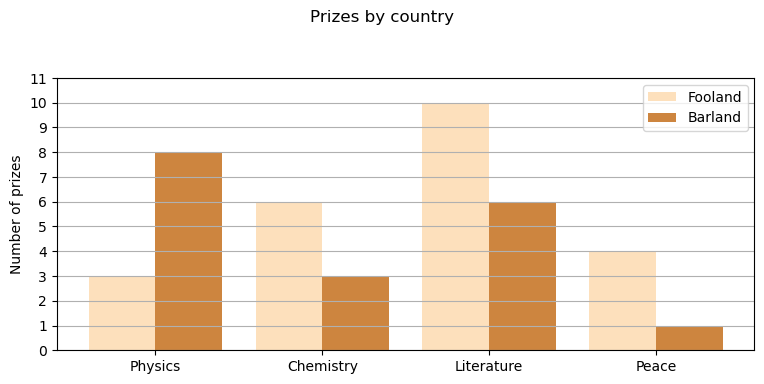

In [23]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))

# With width 1 for two-bar groups, this width give 0.1 bar padding
bar_width = 0.4
xlocs = np.arange(len(foo_data))
ax.bar(xlocs-bar_width, foo_data, bar_width,
       # Matplotlib supports standard HTML colors
       color='#fde0bc', label='Fooland')
ax.bar(xlocs, bar_data, bar_width, color='peru', label='Barland')

#--- ticks, labels, grids, and title
ax.set_yticks(range(12))
ax.set_xticks(xlocs - 0.2)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by country')

# Use pad argument to specify padding around the figure as fraction of font size
fig.tight_layout(pad=2)
fig.savefig('mpl_barchart_multi.png', dpi=200)

### Converting to Horizontal Bar Chart

Switch x and y values and replace bar with barh.

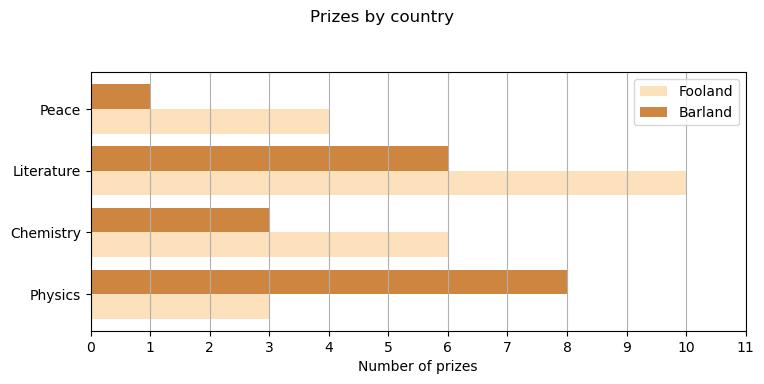

In [26]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.4
ylocs = np.arange(len(foo_data))
ax.barh(ylocs-bar_width, foo_data, bar_width,
       color='#fde0bc', label='Fooland')
ax.barh(ylocs, bar_data, bar_width, color='peru', label='Barland')

#--- ticks, labels, grids, and title
ax.set_xticks(range(12))
ax.set_yticks(xlocs - 0.2)
ax.set_yticklabels(labels)
ax.xaxis.grid(True)
ax.legend(loc='best')
ax.set_xlabel('Number of prizes')
fig.suptitle('Prizes by country')

fig.tight_layout(pad=2)
fig.savefig('mpl_barchart_multi.png', dpi=200)

### Converting to Stacked Bar Chart

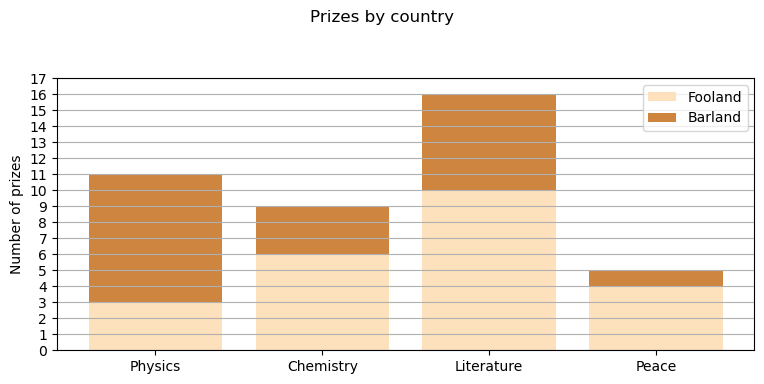

In [29]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data = [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]

fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.8
xlocs = np.arange(len(foo_data))

# foo_data and bar_data bar groups share same x-locations
ax.bar(xlocs, foo_data, bar_width,
       color='#fde0bc', label='Fooland')
ax.bar(xlocs, bar_data, bar_width, 
       color='peru', label='Barland', 
       # Set bottom of bar_data group to top of foo_data
       bottom=foo_data)

#--- Ticks, labels, grids, and title
ax.set_yticks(range(18))
ax.set_xticks(ticks=xlocs)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by country')

fig.tight_layout(pad=2)
fig.savefig('mpl_barchart_multi.png', dpi=200)

### Scatter Plots

Another useful chart is the scatter plot, which takes 2D arrays of points with options for point size, color, and more.

Text(0.5, 0.98, 'A Simple Scatterplot')

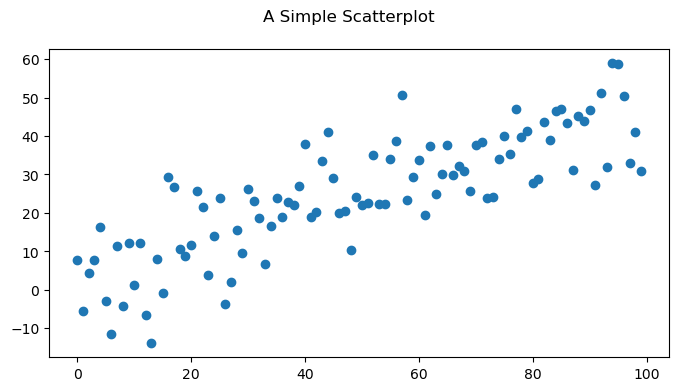

In [32]:
# number of points
num_points = 100

# rate at which y-var changes with change in x-var
gradient = 0.5

# x-axis from 0 to 99
x = np.array(range(num_points))

# randn gives normally distributed random numbers, which
# we scale to be within 0 and 10, then add x-dependent val
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))

# Equally sized x and y arrays provide point coordinates
ax.scatter(x, y) 

fig.suptitle('A Simple Scatterplot')

We can adjust the size and color of individual points by passing an array of marker sizes and color indices to the current default colormap.

Note: we are specifying the area of the markers' bounding boxes, not the circles' diameter. This means if we want points to double the diameter of the circles, we must increase the size by a factor of four.

Text(0.5, 0.98, 'Scatterplot with Color and Size Specified')

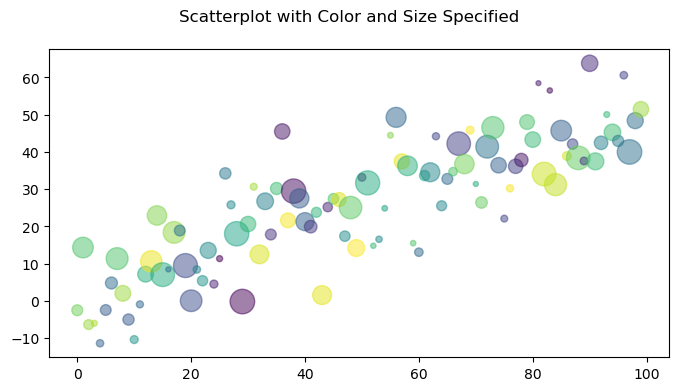

In [35]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))

# Produces 100 random color values between 0 and 1 for default colormap
colors = np.random.rand(num_points)

# Use power notation ** to square values between 2 and 10, the width range for markers
size = np.pi * (2 + np.random.rand(num_points) * 8) ** 2

# Use alpha argument to make markers half-transparent
ax.scatter(x, y, s=size, c=colors, alpha=0.5)
fig.suptitle('Scatterplot with Color and Size Specified')

### Adding a Regression Line

A regression line is a simple predictive model of the correlation between two variables, in this case the x and y coordinates of our scatter plot. The line is essentially a best fit through the points of the plot, and adding one to a scatter plot is a useful dataviz technique and a good way to demo Matplotlib and NumPy interaction.

In below example, NumPy's polyfit function is used to generate the gradient and constant of a best-fit line for the points defined by the x and y arrays.

Text(0.5, 0.98, 'Scatterplot With Regression-line')

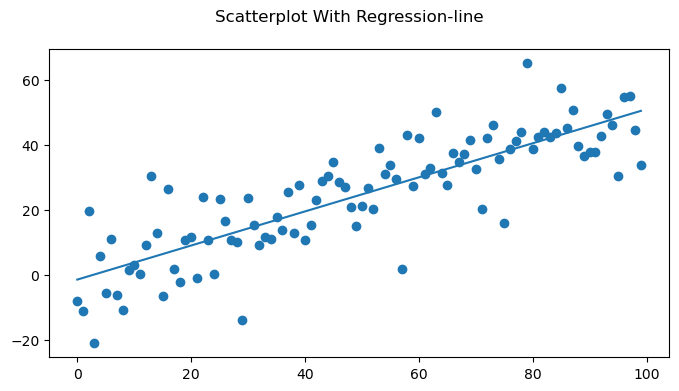

In [36]:
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

# Get line gradient m and constant c for best-fit line
m, c = np.polyfit(x, y ,1)

# Use gradient and constant to plot line (y = mx + c)
ax.plot(x, m*x + c)
fig.suptitle('Scatterplot With Regression-line')

Note: it’s generally a good idea to plot confidence intervals when doing line regression. This gives an idea of how reliable the line fit is, based on the number and distribution of the points. This can be easily done using the seaborn library.

### seaborn

seaborn extends Matplotlib with some powerful statistical plots and is well integrated with the PyData stack. It doesn't hide the Matplotlib API, so you can tweak your charts with Matplotlib's tools.

In [38]:
import seaborn as sns # relies on matplotlib
import matplotlib as mpl

Many of seaborn's functions are designed to accept a pandas DataFrame, allowing you to specify, for example, the column values describing 2D scattered points. Example:

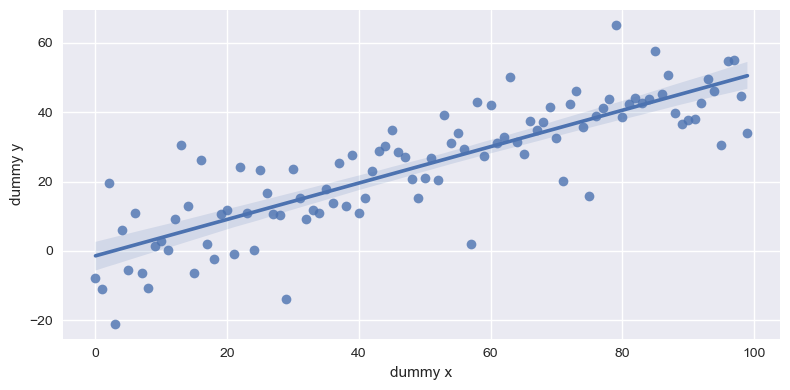

In [42]:
data = pd.DataFrame({'dummy x':x, 'dummy y':y})

# lmplot is seaborn's linear regression plot
# x and y specify column names of df data that define point coords
sns.lmplot(data=data, x='dummy x', y='dummy y',
           # provide height in inches and aspect ratio of w/h to set figure size
           height=4, aspect=2)

# seaborn shares pyplot global context, so you can save plots same way as Matplotlib
plt.tight_layout() 
plt.savefig('mpl_scatter_seaborn.png')

Making visual adjustments and changing confidence interval:

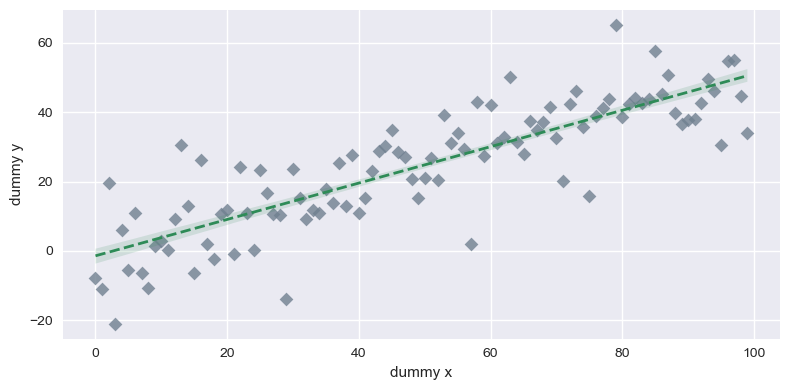

In [44]:
sns.lmplot(data=data, x='dummy x', y='dummy y', height=4, aspect=2,
           scatter_kws={"color": "slategray"},
           line_kws={"linewidth": 2, "linestyle":'--',
                     "color": "seagreen"},
           # Set markers to diamonds
           markers='D',
           
           # Change confidence interval
           ci=68)

### FacetGrids

Often referred to as “lattice” or “trellis” plotting, the ability to draw multiple instances of the same plot on different subsets of your dataset is a good way to get a bird’s-eye view of your data. Large amounts of information can be presented in one plot, and relationships between the different dimensions can be quickly apprehended. This technique is related to the small multiples popularized by Edward Tufte.

FacetGrids require the data to be in the form of a pandas DataFrame and in a form referred to by Hadley Wickham, creator of ggplot2, as “tidy,” meaning each column in the DataFrame should be a variable and each row an observation.

Tips is a small set of data showing the distribution of tips by various dimensions, such as day of the week or whether the customer was a smoker.

In [51]:
tips = sns.load_dataset('tips')

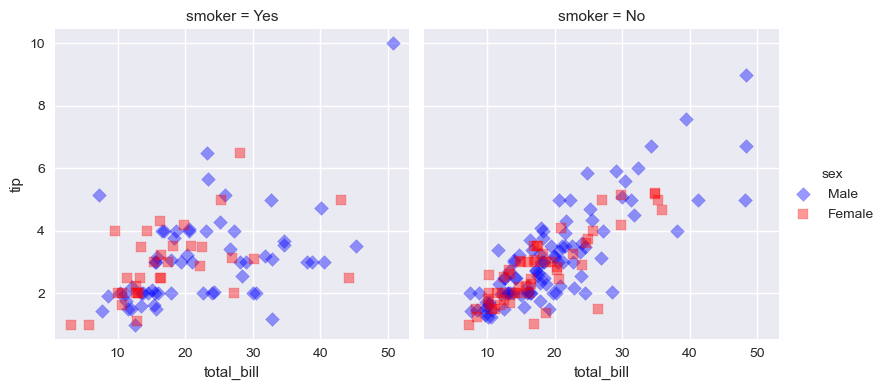

In [52]:
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, col="smoker",
                  hue="sex", hue_kws={"marker": ["D", "s"]},
                  palette=pal, height=4, aspect=1, )

# map takes plot class (scatter), and two dimensions required for scatter plot
g.map(plt.scatter, "total_bill", "tip", alpha=.4)
g.add_legend();

We can use rows as well as columns to create subsets of the data by dimension. Combining the two allows, with the help of a regplot, five dimensions to be explored:

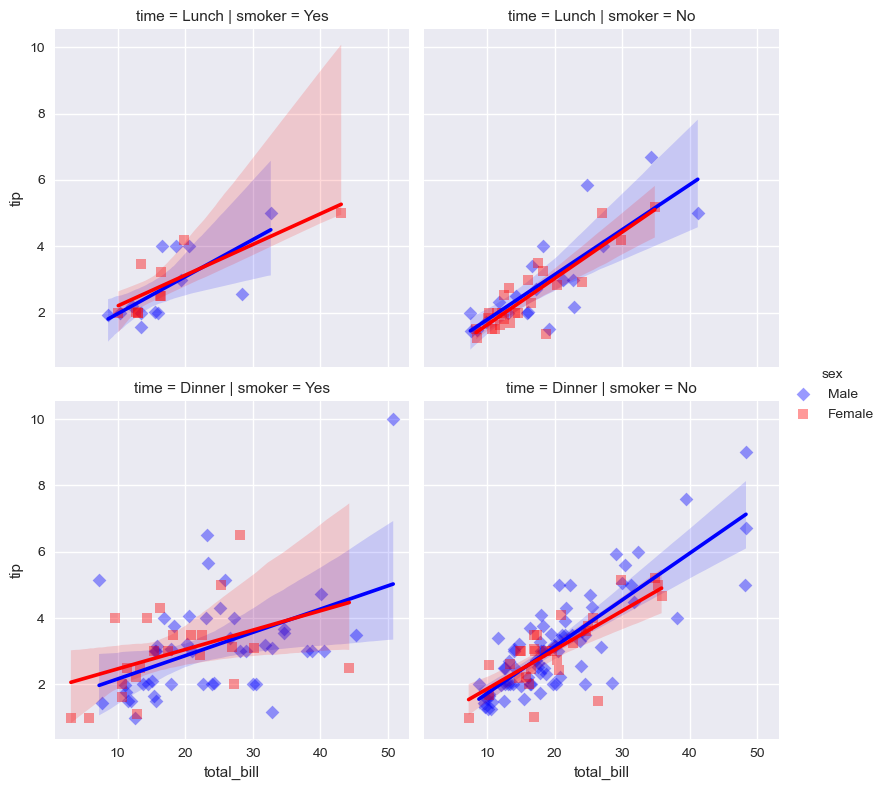

In [57]:
pal = dict(Female='red', Male='blue')

# Adds time row to separate tips by lunch and dinner
g = sns.FacetGrid(tips, col="smoker", row="time",
                  hue="sex", hue_kws={"marker": ["D", "s"]},
                  palette=pal, height=4, aspect=1)
g.map(sns.regplot, "total_bill", "tip", scatter_kws={'alpha':0.4})
g.add_legend();

This can also be written using lmplot:

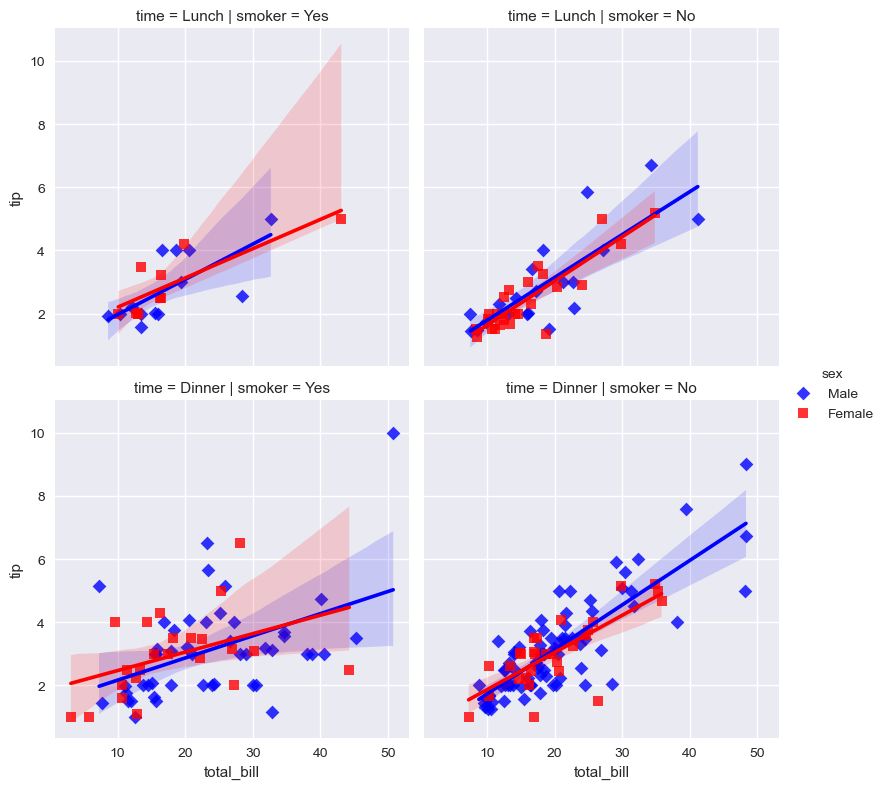

In [58]:
pal = dict(Female='red', Male='blue')
sns.lmplot(x="total_bill", y="tip", hue="sex",
           markers=["D", "s"],
           col="smoker", row="time", data=tips, palette=pal,
           height=4, aspect=1
           );

### PairGrids

Unlike with FacetGrids, you don’t divide the dataset into subsets that are then compared by designated dimensions. With PairGrids, the dataset’s dimensions are all compared pair-wise in a square grid. By default all dimensions are compared, but you can specify which ones get plotted by providing a list to the vars parameter when declaring the PairGrid.

Example using popular Iris dataset:

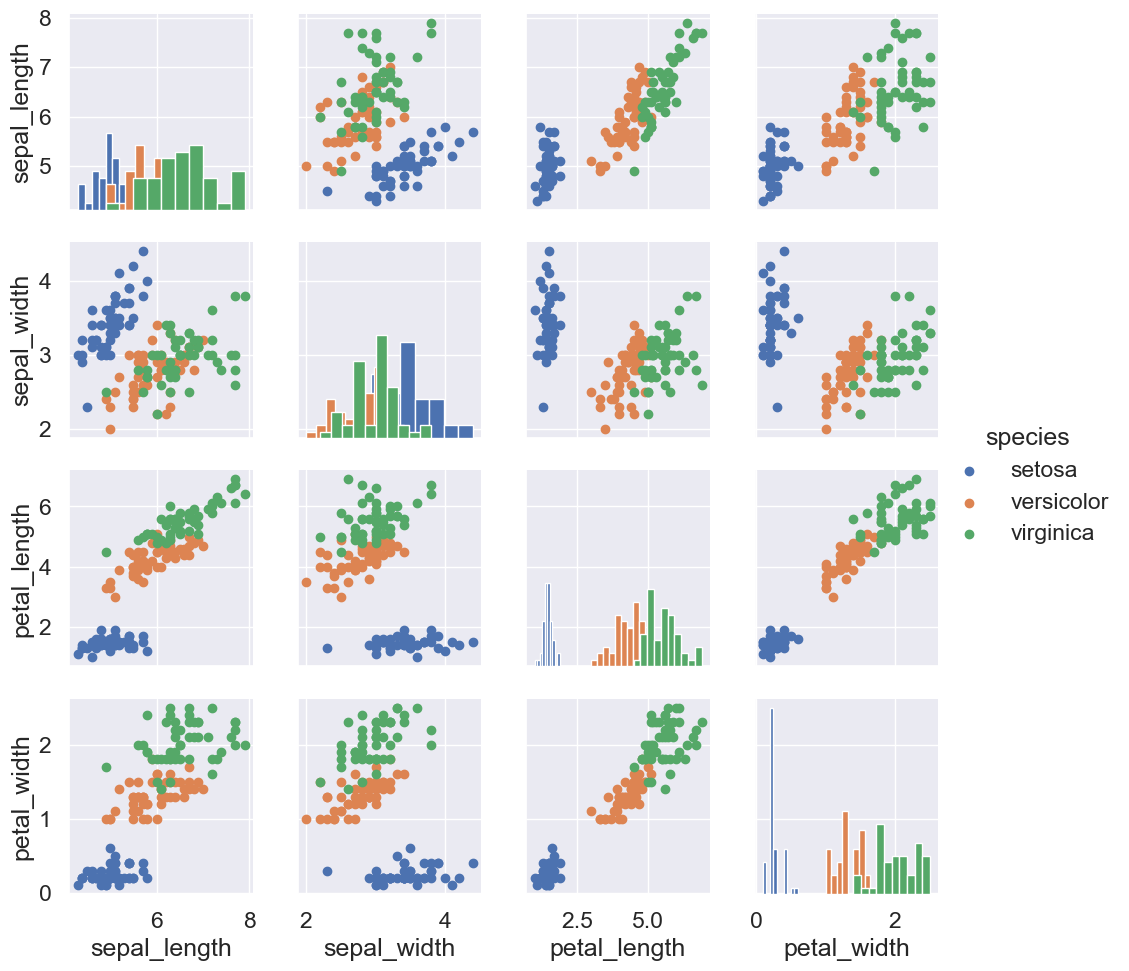

In [59]:
iris = sns.load_dataset('iris')

# makes font bigger
sns.set_theme(font_scale=1.5)

# Sets markers and subbars to be colored by species
g = sns.PairGrid(iris, hue="species")

# Places histograms of species' dimensions on grid's diagonal
g.map_diag(plt.hist)

# Uses standard scatter plots to compare dimensions of diagonal
g.map_offdiag(plt.scatter)
g.add_legend();